# Introduction to Scikit-learn (sklearn)
This notebook demonstrates some of the most useful functions of the                    
  
beautiful Scikit—Learn library
What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting thr data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make pridiction on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0.An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
heart_disease = pd.read_csv("../../data/heart-disease.csv")

In [4]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
heart_disease.shape

(303, 14)

In [9]:
# Create X (feature matrix)
X = heart_disease.drop("target",axis=1)

# Create Y (labels)
y = heart_disease["target"]

## 2. Chose the right model and hyperparameters

In [15]:
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()                                        
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model to the training data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
clf.fit(X_train, y_train);

## make a prediction

In [18]:
y_preds = clf.predict(X_test)

In [19]:
  y_preds

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
y_test

167    0
293    0
166    0
46     1
199    0
      ..
132    1
108    1
50     1
156    1
272    0
Name: target, Length: 61, dtype: int64

## 4. Evaluate the model on training data and test data

In [21]:
clf.score(X_train, y_train)

1.0

In [22]:
clf.score(X_test, y_test)

0.7868852459016393

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



In [27]:
confusion_matrix(y_test, y_preds)

array([[20,  9],
       [ 4, 28]], dtype=int64)

In [28]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [30]:
## 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    #for rounding we used *100:.2f

Trying model with 10 estimators...
Model accuracy on test set: 78.69%
Trying model with 20 estimators...
Model accuracy on test set: 78.69%
Trying model with 30 estimators...
Model accuracy on test set: 78.69%
Trying model with 40 estimators...
Model accuracy on test set: 78.69%
Trying model with 50 estimators...
Model accuracy on test set: 78.69%
Trying model with 60 estimators...
Model accuracy on test set: 78.69%
Trying model with 70 estimators...
Model accuracy on test set: 78.69%
Trying model with 80 estimators...
Model accuracy on test set: 78.69%
Trying model with 90 estimators...
Model accuracy on test set: 78.69%


In [31]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model.pkl","wb"))

In [32]:
!conda list python

# packages in environment at C:\Users\HP SSD\Desktop\ml-course\sample_project_1\env:
#
# Name                    Version                   Build  Channel
brotli-python             1.0.9           py312hd77b12b_8  
ipython                   8.20.0          py312haa95532_0  
python                    3.12.3               h1d929f7_1  
python-dateutil           2.9.0post0      py312haa95532_2  
python-fastjsonschema     2.16.2          py312haa95532_0  
python-graphviz           0.20.1          py312haa95532_0  
python-json-logger        2.0.7           py312haa95532_0  
python-slugify            8.0.4              pyhd8ed1ab_0    conda-forge
python-tzdata             2023.3             pyhd3eb1b0_0  


In [33]:
# Warning
# import warnings
# warnings.filterwarnings("default")

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data Into features and labels (usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non—numerical values to numerical values (also called feature encoding)

In [34]:
heart_disease[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
X = heart_disease.drop("target" , axis=1)

In [36]:
X[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [37]:
y = heart_disease["target"]

In [38]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [39]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train  ,X_test ,y_train ,y_test = train_test_split(X ,
                                                     y ,
                                                     test_size=0.2)

In [41]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [42]:
X.shape[0] *0.8

242.4

In [43]:
len(heart_disease)

303

# 1.1 Make sure it's all numerical

In [45]:
car_sales = pd.read_csv("../../data/car-sales-extended.csv")

In [46]:
car_sales[:5]

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [47]:
len(car_sales)

1000

In [48]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [49]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [50]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [51]:
# Build machine learning model
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [52]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [54]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_feature)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [55]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [56]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])

In [57]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [58]:
# np.random.seed(42)

# # Create train and test splits with transformed_X
# X_train, X_test, y_train, y_test = train_test_split(transformed_X,
#                                                     y,
#                                                     test_size=0.2)

# # Create the model instance
# model = RandomForestRegressor()

# # Fit the model on the numerical data (this errored before since our data wasn't fully numeric)
# model.fit(X_train, y_train)

# # Score the model (returns r^2 metric by default, also called coefficient of determination, higher is better)
# model.score(X_test, y_test)

## 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation) .
2. Remove the samples with missing data altogether.

In [59]:
# Import car sales missing data
car_sales_missing = pd.read_csv("../../data/car-sales-extended-missing-data.csv")

In [60]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [61]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [62]:
# Create X & y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [63]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_feature)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [64]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Fill missing data with pandas

In [65]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)
# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

C:\Users\HP SSD\AppData\Local\Temp\ipykernel_9740\1405179978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
C:\Users\HP SSD\AppData\Local\Temp\ipykernel_9740\1405179978.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [66]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [67]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [68]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [69]:
len(car_sales_missing)

950

In [70]:
X = car_sales_missing.drop("Price", axis=1)
y =car_sales_missing["Price"]

### Option 2: Fill missing values with Scikit-Learn

In [71]:
car_missing_missing = pd.read_csv("../../data/car-sales-extended-missing-data.csv")
car_missing_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [72]:
# Drop the rows with no labels
car_missing_missing.dropna(subset=["Price"], inplace=True)
car_missing_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [73]:
# Split into X & y
X = car_missing_missing.drop("Price", axis=1)
y = car_missing_missing["Price"]

In [74]:
# Fill missing values with Scikit—Learn
# from sklearn.impute import SimpleImputer
  
# from sklearn.compose import ColumnTransformer

# # Fill categorical values with 'missing' & numerical values with mean
# cat_imputer = Simplelmputer(strategy="constant", fill_value="missing")
# dog_imputer = Simplelmputer(strategy="constant", fill_value=4)
# num_imputer = Simplelmputer(strategy="mean")

# # Define columns
# cat_feature = ["Make", "Colour"]
# door_feature = ["Doors"]
# num_feature = ["Odometer (KM)"]

# # Create an imputer (something that fills missing data)
# imputer = ColumnTransformer( [
# ( "cat imputer" , cat_imputer, cat_feature),
# ( "door imputer" , door_imputer, door_feature),
# ( "num imputer" , num_imputer, features)])
# # Transform the data
# filled_X = imputer.fit_tranformer(X)
# filled_X

# 2.1 Picking a machine learning model for a regression problem
<img src="https://scikit-learn.org/1.3/_static/ml_map.png" />
Let's use the California Housing dataset 

In [75]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [76]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [77]:
# Import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score() metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.5758549611440125

### Improving Model
ensemble : Random forest Regressor

In [79]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)
# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

# 2.2 Choosing an estimator for a classification problem
Let's go to the map... https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html

In [64]:
from sklearn.datasets import load_iris
iris = load_iris()

In [65]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [66]:
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df["target"] = pd.Series(iris["target"])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
X = iris_df.drop("target", axis=1)
y = iris_df["target"]
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [68]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [69]:
clf.score(X_test,y_test)

1.0

In [70]:
heart_disease = pd.read_csv("../../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Consulting the map and it says to try LinearSVC .

In [71]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [72]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:

        1. If you have structured data, used ensemble methods
        2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make prediction

### 3.1 Fit the model to the data

Different names for:
* `X` = features, features variables, data* `y` = 
labels, targets, target variables

In [73]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC (use the patterns the model just learned)
clf.score(X_test, y_test)

0.8524590163934426

In [74]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [75]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### 3.2 Make predictions using a machine learning model
2 ways to make predictions :
1. predict()
2. predict_proba()

In [76]:
# Use a trained model to make predictions
# clf.predict(np.array[1,7,8,3,4]) #this dosen't work...

In [77]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [78]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [82]:
clf.score(X_test, y_test)

0.8524590163934426

### Make predictions with preict_proba()

In [83]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [84]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [85]:
# Let's predict() on the same data...
clf.predict(np.array([80 ,1 ,0 ,150 ,400 ,30 ,3 ,500 ,1 ,1 ,1 ,1 ,1]).reshape(1,-1))

C:\Users\HP SSD\Desktop\ml-course\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [86]:
X_test[:1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1


### `predict()` can also be used for regression models.

In [87]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create th data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model =  RandomForestRegressor()

# fiting the model with data
model.fit(X_train, y_train)
# Make predictions
y_preds = model.predict(X_test)

In [89]:
y_preds[:20]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779, 1.17707  , 2.0864401,
       1.58227  , 1.79462  , 2.47832  , 1.55178  , 1.84546  , 1.74466  ,
       1.51263  , 0.89915  ])

In [90]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [91]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [92]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model
Three ways to evaluate Scikit—Learn models/estimators:

    1. Estimator's built—in `score()` method
    2. The `scoring` parameter
    3. Problem—specific metric functions
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the score method

In [93]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target" ,axis=1)
y = heart_disease["target"]

# Create train/ test
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

# Fit classifier to training data
clf.fit(X_train ,y_train)

RandomForestClassifier(n_estimators=1000)

In [94]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [95]:
clf.score(X_test, y_test)

0.8688524590163934

### Let's use the `score()` on our regression problem...

In [96]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create th data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model =  RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [97]:
# The default score() evaluation metric is r squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8065734772187598

## 4.2 Evaluating a model using the scoring parameter

In [98]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target" ,axis=1)
y = heart_disease["target"]                  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [99]:
clf.score(X_test, y_test)

0.8524590163934426

In [100]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [101]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X, y)

# Take the mean of 5—fold cross—validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.9702970297029703, 0.8248087431693989)

In [102]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8524590163934426

In [103]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [104]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
from sklearn.model_selection import cross_val_score                    
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [106]:
np.mean(cross_val_score)

0.8248087431693989

In [107]:
print(f"Heart Disease Classifier Cross—Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross—Validated Accuracy: 82.48%


#### Area Under Receiver Operating Characteristic (ROC) Curve
If this one sounds like a mouthful, its because reading the full name is.

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function.when truth is Iedicts 0 when truth is 1s 1

In [108]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [110]:
y_probs_postive = y_probs[:, 1]
y_probs_postive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [111]:
# Calculate fpr, tpr and tresholds
fpr, tpr, tresholds = roc_curve(y_test, y_probs_postive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

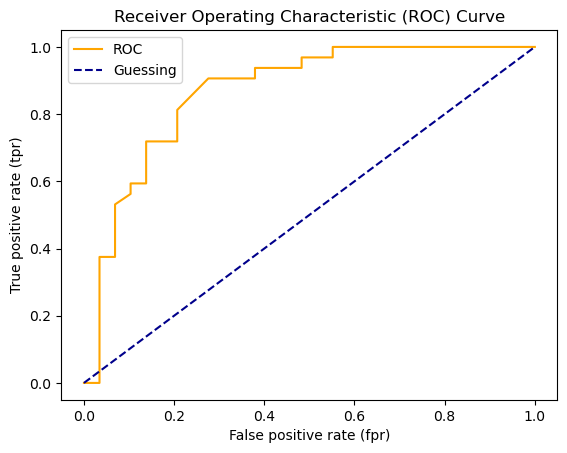

In [112]:
#  Creating a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true postive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle = "--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [113]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_postive)

0.8669181034482759

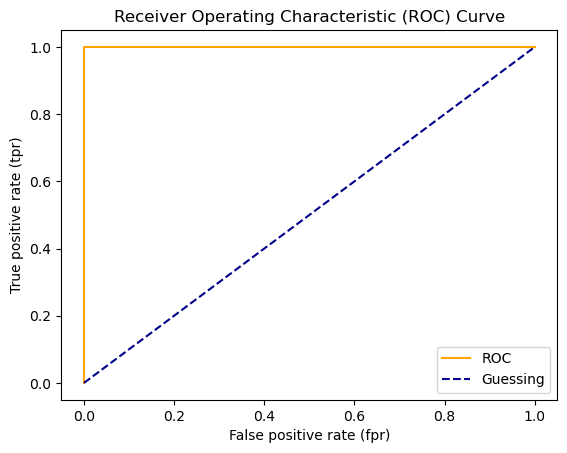

In [114]:
# PLot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,  tpr)

In [115]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
y_preds = clf.predict(X_test)

In [118]:
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [119]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


# Make our confusion matrix more visual with Seaborn's heatmap

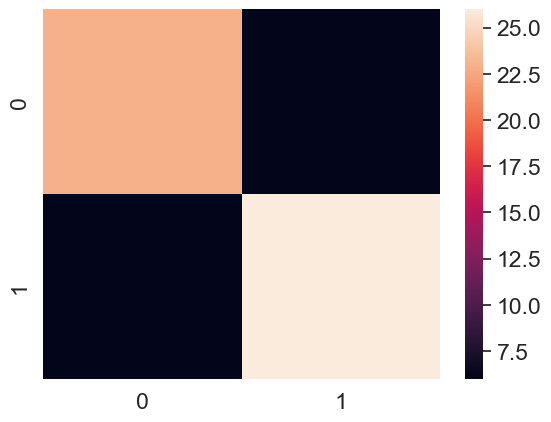

In [120]:
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [121]:
clf

RandomForestClassifier()

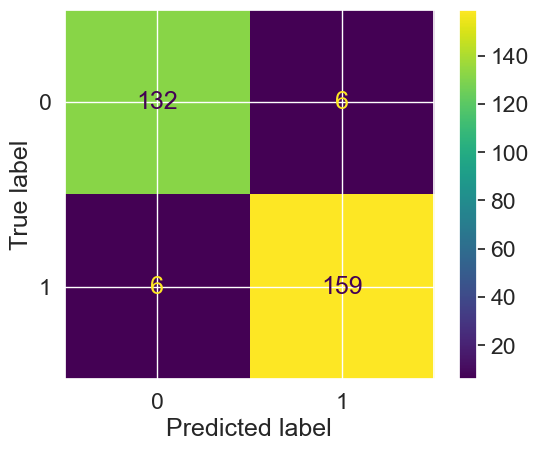

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

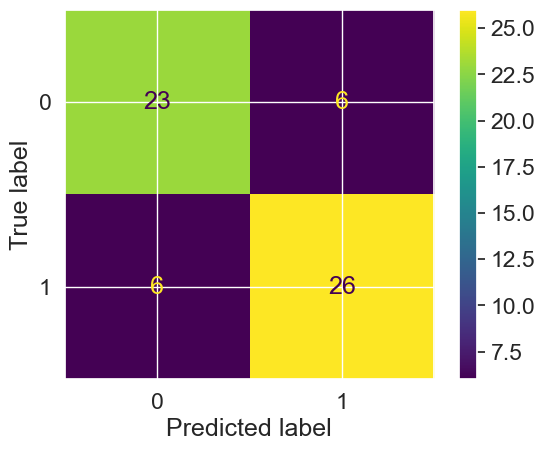

In [123]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)

## Clasification Report

In [124]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



It returns four columns: precision, recall, f1-score and support.                                                            
  
  
  

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:
* **Precision** - Indicates the proportion of positive identifications (model predicted class `1`) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great!
...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

In [125]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


You can see here, we've got an accuracy of 0.9999 (99.99%), great precision and recall on class 0.0 but nothing for class 1.0.                                        
  
  

Ask yourself, although the model achieves 99.99% accuracy, is it useful?

To summarize:
* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

> **Resource:** For more on precision and recall and the tradeoffs between them, I'd suggest going through the [Scikit-Learn Precision-Recall guide](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html).

### 4.2.2 Regression model evaluation metrics

Similar to classification, there are [several metrics you can use to evaluate your regression models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

We'll check out the following.

1. **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. Higher is better.
2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were. Lower is better.
3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors). Lower is better.

Let's see them in action. First, we'll bring down our regression model code again.

In [126]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model =RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [127]:
model.score(X_test, y_test)

0.8065734772187598

In [128]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [129]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [130]:
y_test.mean()

2.0550030959302323

In [131]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [132]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [133]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [134]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.

**Mean Absolute Error (MAE)**

A model's mean absolute error can be calculated with Scikit-Learn's [`sklearn.metrics.mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) method.

In [135]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [136]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [137]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [138]:
df =pd.DataFrame(data={"actual values": y_test,
                      "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [139]:
# Mae using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

## Mean squared error (MSE)

MSE is the mean of the square of the square of the errrors between actual and predicted values.

In [140]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [141]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [142]:
# Calculate MSA by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [143]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

C:\Users\HP SSD\AppData\Local\Temp\ipykernel_13108\3409892222.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [144]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [145]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2573437523766412

In [146]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


# RECALL!
[UDEMY](https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/17690056#overview)

## 4.2.3 Finally using the `scoring` parameter

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

#### `if scoring = None, estimator's default scoring evaluation metric is used(accuracy for classification)`

In [148]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [149]:
# Precision

np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [150]:
# Cross-validation precision
print(f"The Cross-Validation precision is {np.mean(cv_precision)}")

The Cross-Validation precision is 0.8329547346025924


In [151]:
# Recall

np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [152]:
# Cross-validation recall
print(f"The Cross-Validation recall is {np.mean(cv_recall)}")

The Cross-Validation recall is 0.8545454545454545


In [153]:
# f1_score

np.random.seed(42)

cv_f1_score = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1_score

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [154]:
# Cross-validation f1
print(f"The Cross-Validation f1 is {np.mean(cv_f1_score)}")

The Cross-Validation f1 is 0.8426854603423344


### Let's see the `scoring` parameter being using for a regression problem...

In [155]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# housing

housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
# housing_df.head()

# making features and labels
X = housing_df.drop("target", axis=1)
y = housing["target"]

In [156]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [157]:
model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [158]:
# cv_regression: R2(default)

cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)

In [159]:
cv_r2

array([0.61791127, 0.72549807, 0.6254963 ])

In [160]:
np.mean(cv_r2)

0.6563018797685268

---------------------------------------------

In [161]:
# cv_regression: Max_error

cv_max_error = cross_val_score(model, X, y, cv=3, scoring="max_error")

In [162]:
cv_max_error

array([-3.78666  , -3.46762  , -3.8754599])

In [163]:
np.mean(cv_max_error)

-3.7099133

---------------------------------------------

In [164]:
# cv_regression: MAE 

cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")

In [165]:
cv_mae

array([-0.5220408 , -0.42498125, -0.5022885 ])

In [166]:
np.mean(cv_mae)

-0.48310351709302335

---------------------------------------------

In [167]:
# cv_regression: MSE

cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")

In [168]:
cv_mse

array([-0.51682351, -0.33164985, -0.53696516])

In [169]:
np.mean(cv_mse)

-0.46181284144120105

## **4.3 Using different evaluation metrics as Scikit-Learn functions**

#### The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics`

In [170]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 78.69%
Precision: 0.7631578947368421
Recall: 0.8787878787878788
F1: 0.8169014084507042


In [171]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")

Regression metrics on the test set
R2: 80.66%
MSE: 0.2534678520824551
MAE: 0.32659871732073664


## 5. Improving a Model

First predictions = baseline predictions.F
irst model = baseline model

From a data perspective:*  Could we collect more data (generally,the more data, the better)     

* Could we improve our data?

From a model perspective:
* Is there a better model we could ue* Could 
weixmprove h e current md l? (Hyperparameters)

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data                     
* Hyperparameters 
= setixngs on a mdel s
you cadja Just to (potiallyaiy) xmprive ability to find patterns.

Three ways to adjust hyperparameters : 
1. By hand  
 22 . Randomly with RandomSearchC 
 3
3. Exhaustively with GridSearcCvl Itseter )
Go?.

In [172]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [173]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

In [174]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust

* `max_depth`
* `max_features`                                        
* `min_sample_leaf`
* `min_samples_split`
* `n_estimators`  mators
We'll use the same code as before, except this time we'll create a training, validation and test split.

With the training set containing 70% of the data and the validation and test sets each containing 15%.

Let's get some baseline results, then we'll tune the model.

And since we're going to be evaluating a few models, let's make an evaluation function.

In [175]:
def evaluate_preds(y_true: np.array, y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set the seed
np.random.seed(42)

# Read in the data
heart_disease = pd.read_csv("../../data/heart-disease.csv")

# Split into X (features) & y (labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Training and test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create validation and test split by spliting testing data in half (30% test -> 15% validation, 15% test)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.78
Recall: 0.88
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.88, 'f1': 0.82}

In [177]:
# Check the sizes of the splits
print(f"Training data: {len(X_train)} samples, {len(y_train)} labels")
print(f"Validation data: {len(X_valid)} samples, {len(y_valid)} labels")
print(f"Testing data: {len(X_test)} samples, {len(y_test)} labels")

Training data: 212 samples, 212 labels
Validation data: 45 samples, 45 labels
Testing data: 46 samples, 46 labels


In [178]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 77.78%
Precision: 0.77
Recall: 0.83
F1 score: 0.80


### 5.2 Hyperparameter tuning with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Scikit-Learn's [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) allows us to randomly search across different hyperparameters to see which work best. 

It also stores details about the ones which work best!

Let's see it in action.

First, we create a dictionary of parameter distributions (collections of different values for specific hyperparamters) we'd like to search over.

This dictionary comes in the form:

```python
param_distributions = {"hyperparameter_name": [values_to_randomly_try]}
```

Where `"hyperparameter_name"` is the value of a specific hyperparameter for a model and `[values_to_randomly_try]` is a list of values for that specific hyperparamter to randomly try.

In [179]:
# Hyperparameter grid RandomizedSearchCV will search over
param_distributions = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                       "max_depth": [None, 5, 10, 20, 30],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4, 6, 8],
                       "min_samples_leaf": [1, 2, 4, 8]}

Where did these values come from?

They're made up.

Made up?

Yes.

Not completely pulled out of the air but after reading the Scikit-Learn documentation on Random Forest's you'll see some of these values have certain values which usually perform well and certain hyperparameters take strings rather than integers.

Now we've got the parameter distribution dictionary setup, Scikit-Learn's RandomizedSearchCV will look at it, pick a random value from each, instantiate a model with those values and test each model.

How many models will it test?

As many as there are for each combination of hyperparameters to be tested. Let's add them up.

In [180]:
# Count the total number of hyperparameter combinations to test
total_randomized_hyperparameter_combintions_to_test = np.prod([len(value) for value in param_distributions.values()])
print(f"There are {total_randomized_hyperparameter_combintions_to_test} potential combinations of hyperparameters to test.")

There are 1440 potential combinations of hyperparameters to test.


Woah!

That's a lot of combinations!

Or...

We can set the `n_iter` parameter to limit the number of models `RandomizedSearchCV` tests (e.g. `n_iter=20` means to try `20` different random combintations of hyperparameters and will cross-validate each set, so if `cv=5`, 5x20 = 100 total fits).

The best thing? 

The results we get will be cross-validated (hence the CV in `RandomizedSearchCV`) so we can use `train_test_split()`.

And since we're going over so many different models, we'll set `n_jobs=-1` in our [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) so Scikit-Learn takes advantage of all the cores (processors) on our computers.

Let's see it in action.

> **Note:** Depending on `n_iter` (how many models you test), the different values in the hyperparameter grid, and the power of your computer, running the cell below may take a while (for reference, it took about ~1-minute on my M1 Pro MacBook Pro).

In [181]:
# Start the timer
import time
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)                    
                      
                      
  

# Set n_jobs to -1 to use all available cores on your machine (if this causes errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV 
n_iter = 30 # try 30 models total
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            n_iter=n_iter, 
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
rs_clf.fit(X_train, y_train);

# Finish the timer
end_time = time.time()
print(f"[INFO] Total time taken for {n_iter} random combinations of hyperparameters: {end_time - start_time:.2f} seconds.")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50

When `RandomizedSearchCV` goes through `n_iter` combinations of of hyperparameter search space, it stores the best ones in the attribute `best_params_`.

In [182]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

Now when we call `predict()` on `rs_clf` (our `RandomizedSearchCV` version of our classifier), it'll use the best hyperparameters it found.

In [183]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


### 5.3 Hyperparameter tuning with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (Try every parameter)

There's one more way we could try to improve our model's hyperparamters. 

And it's with [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

The main difference between `GridSearchCV` and `RandomizedSearchCV` is `GridSearchCV` searches across a grid of hyperparamters exhaustively (it will try every combination possible), where as, `RandomizedSearchCV` searches across a grid of hyperparameters randomly (stopping after `n_iter` combinations).

`GridSearchCV` also refers to a dictionary of parameter distributions as a parameter grid (via the parameter `param_grid`).

For example, let's see our dictionary of hyperparameters.

In [184]:
param_distributions

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6, 8],
 'min_samples_leaf': [1, 2, 4, 8]}

`RandomizedSearchCV` tries `n_iter` combinations of different values. 

Where as, `GridSearchCV` will try every single possible combination. 

And if you remember from before when we did the calculation: `max_depth` has 4 values, `max_features` has 2, `min_samples_leaf` has 3, `min_samples_split` has 3, `n_estimators` has 5. 

That's 4x2x3x3x5 = 360 models!

This could take a long time depending on the power of the computer you're using, the amount of data you have and the complexity of the hyperparamters (usually higher values means a more complex model).

In our case, the data we're using is relatively small (only ~300 samples).

Since we've already tried to find some ideal hyperparameters using `RandomizedSearchCV`, we'll create another hyperparameter grid based on the `best_params_` of `rs_clf` with less options and then try to use `GridSearchCV` to find a more ideal set.

In essence, the workflow could be:
1. Tune hyperparameters by hand to get a feel of the data/model.
2. Create a large set of hyperparameter distributions and search across them randomly with `RandomizedSearchCV`.
3. Find the best hyperparameters from 2 and reduce the search space before searching across a smaller subset exhaustively with `GridSearchCV`.

> **Note:** Based on the `best_params_` of `rs_clf` implies the next set of hyperparameters we'll try are roughly in the same range of the best set found by `RandomizedSearchCV`.

In [185]:
# Create hyperparameter grid similar to rs_clf.best_params_
param_grid = {"n_estimators": [200, 1000],
              "max_depth": [30, 40, 50],
              "max_features": ["log2"],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [4]}

In [186]:
# Count the total number of hyperparameter combinations to test
total_grid_search_hyperparameter_combinations_to_test = np.prod([len(value) for value in param_grid.values()])
print(f"There are {total_grid_search_hyperparameter_combinations_to_test} combinations of hyperparameters to test.")
print(f"This is {total_randomized_hyperparameter_combintions_to_test/total_grid_search_hyperparameter_combinations_to_test} times less\
 than before (previous: {total_randomized_hyperparameter_combintions_to_test}).")

There are 24 combinations of hyperparameters to test.
This is 60.0 times less than before (previous: 1440).


Now when we run `GridSearchCV`, passing it our classifier (`clf`), parameter grid (`param_grid`) and the number of cross-validation folds we'd like to use (`cv=5`), it'll create a model with every single combination of hyperparameters, and then cross-validate each 5 times (for example, 36 hyperparameter combinations * 5 = 135 fits in total) and check the results.

> **Note:** Depending on the compute power of the machine you're using, the following cell may take a few minutes to run (for reference, it took ~60 seconds on my M1 Pro MacBook Pro).  

In [187]:
# Start the timer
import time
start_time = time.time()

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available machine cores (if this produces errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

# Find the running time
end_time = time.time()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=

In [188]:
# How long did it take? 
total_time = end_time - start_time
print(f"[INFO] The total running time for running GridSearchCV was {total_time:.2f} seconds.")

[INFO] The total running time for running GridSearchCV was 274.57 seconds.


In [189]:
# Check the best hyperparameters found with GridSearchCV
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [190]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}


After trying many different combinations of hyperparamters, we get a slight improvement in results.

However, sometimes you'll notice that your results don't change much.

These things might happen. 

But it's important to remember, it's not over. There more things you can try.

In a hyperparameter tuning sense, there may be a better set we could find through more extensive searching with `RandomizedSearchCV` and `GridSearchCV`, this would require more experimentation.

Other techniques you could:
* **Collecting more data** - Based on the results our models are getting now, it seems like they're very capable of finding patterns. Collecting more data may improve a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on.
* **Try a more advanced model** - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as [XGBoost](https://xgboost.ai/) or [CatBoost](https://catboost.ai/) might perform better. I'll leave these for extra-curriculum.

Since machine learning is part engineering, part science, these kind of experiments are common place in any machine learning project.

Now we've got a tuned Random Forest model, let's find out how we might save it and export it so we can share it with others or potentially use it in an external application.

In [191]:
from catboost import CatBoostClassifier,Pool

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(Pool(X_train, y_train),                                         
       eval_set=(X_test, y_test), 
       verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [192]:
metrics = clf.eval_metrics(Pool(X_test, y_test)                                  
     ,metrics = ["Accuracy", "Precision" , "F1" ,"Recall"                  
  ])

In [193]:
metrics

{'Accuracy': [0.8360655737704918,
  0.8852459016393442,
  0.8688524590163934,
  0.8688524590163934,
  0.8524590163934426],
 'Precision': [0.8928571428571429,
  0.8787878787878788,
  0.875,
  0.8529411764705882,
  0.8484848484848485],
 'F1': [0.8333333333333334,
  0.8923076923076922,
  0.875,
  0.8787878787878787,
  0.8615384615384615],
 'Recall': [0.78125, 0.90625, 0.875, 0.90625, 0.875]}

In [194]:
cat_metrics_df = pd.DataFrame(metrics)

In [195]:
mean_of_Accuracy = cat_metrics_df['Accuracy'].mean()                                                                                
mean_of_Precision = cat_metrics_df['Precision'].mean()
mean_of_F1 = cat_metrics_df['F1'].mean()
mean_of_Recall = cat_metrics_df['Recall'].mean()

In [196]:
cat_end_metrics = {
    "accuracy" : mean_of_Accuracy,
    "precision" : mean_of_Precision,
    "f1" : mean_of_F1,
    "recall" : mean_of_Recall
}

In [197]:
from catboost import CatBoostClassifier,Pool

# grid = {'learning_rate': [0.03, 0.1,0.5,0.9],
        # 'depth': [4, 6, 10,16],
        # 'l2_leaf_reg': [1, 3, 5, 7, 9],
         # }

# clf_g = CatBoostClassifier(
    # iterations=5, 
    # learning_rate=0.1, 
    #loss_function='CrossEntropy'
# )


# clf.fit(Pool(X_train, y_train),                                         
#        eval_set=(X_test, y_test), 
       
# )                                                            
  
# grid_search_result = clf_g.grid_search(grid,
                                       # X=X_train,
                                       # y=y_train,
                                       # plot=True)

# print('CatBoost model is fitted: ' + str(clf.is_fitted()))
# print('CatBoost model parameters:')
# print(clf.get_params())                                        


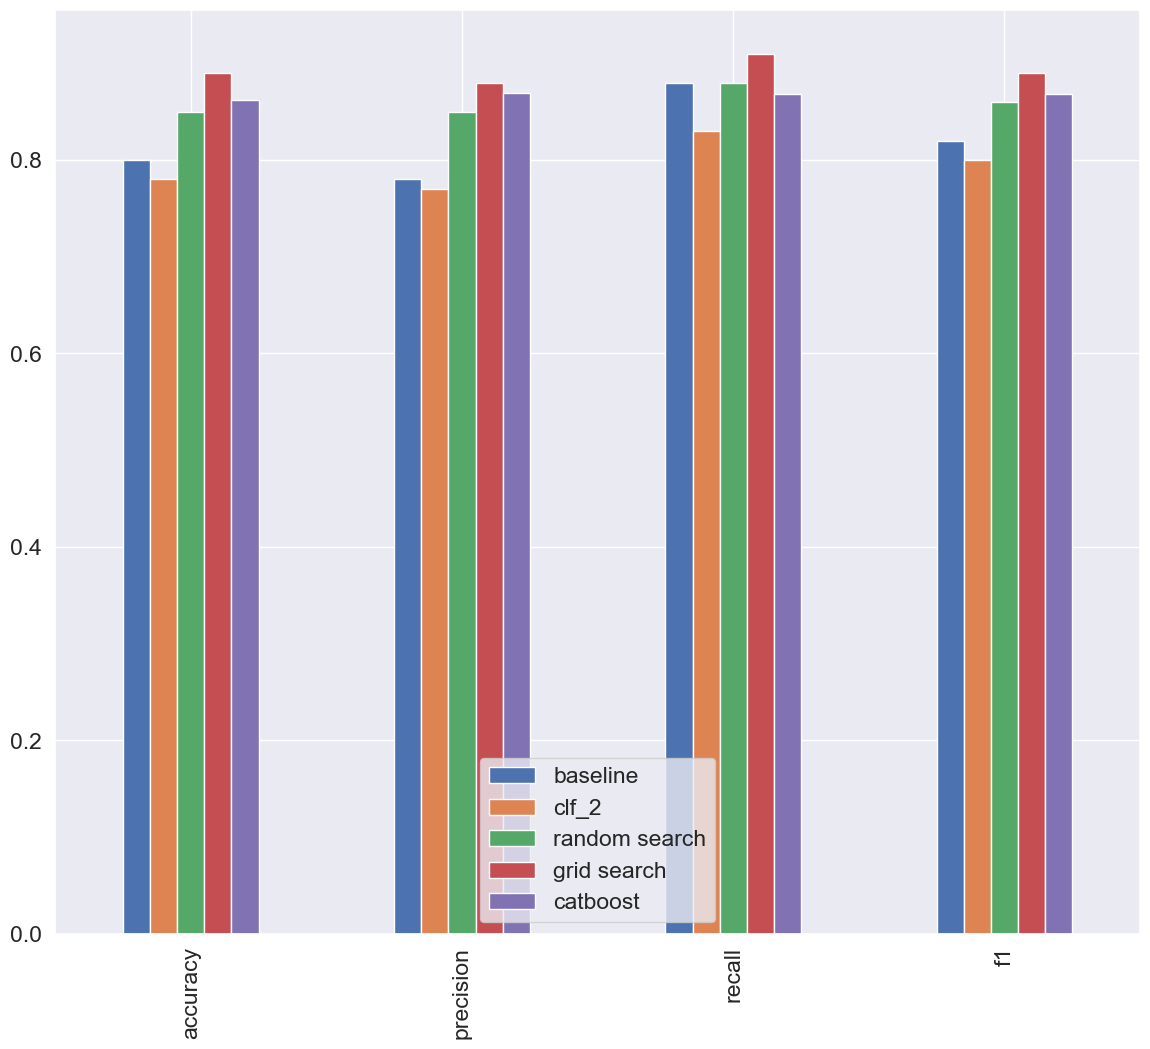

In [199]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics,
                                "catboost": cat_end_metrics})
compare_metrics.plot.bar(figsize=(14, 12));

## 6. Saving and loading trained machine learning models

Our `GridSearchCV` model (`gs_clf`) has the best results so far, we'll export it and save it to file.

### 6.1 Saving and loading a model with `pickle`

We saw right at the start, one way to save a model is using Python's [`pickle` module](https://docs.python.org/3/library/pickle.html).

We'll use `pickle`'s `dump()` method and pass it our model, `gs_clf`, along with the `open()` function containing a string for the filename we want to save our model as, along with the `"wb"` string which stands for "write binary", which is the file type `open()` will write our model as.

In [200]:
import pickle

# Save an existing model to file
best_model_file_name_pickle = "gs_random_forest_model_1.pkl" # .pkl extension stands for "pickle"
pickle.dump(gs_clf, open(best_model_file_name_pickle, "wb"))

In [201]:
# Load a saved model
loaded_pickle_model = pickle.load(open(best_model_file_name_pickle, "rb"))

In [202]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
loaded_pickle_model_metrics = evaluate_preds(y_test, pickle_y_preds)
loaded_pickle_model_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

In [203]:
loaded_pickle_model_metrics == gs_metrics

True

### 6.2 Saving and loading a model with [`joblib`](https://joblib.readthedocs.io/en/latest/persistence.html)

The other way to load and save models is with `joblib`. Which works relatively the same as `pickle`.

To save a model, we can use `joblib`'s `dump()` function, passing it the model (`gs_clf`) and the desired filename.

In [204]:
from joblib import dump, load

# Save a model to file
best_model_file_name_joblib = "gs_random_forest_model_1.joblib"
dump(gs_clf, filename=best_model_file_name_joblib) 

['gs_random_forest_model_1.joblib']

In [208]:
loaded_joblib_model = load(best_model_file_name_joblib)

In [209]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
loaded_joblib_model_metrics = evaluate_preds(y_test, joblib_y_preds)
loaded_joblib_model_metrics 

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

In [210]:
loaded_joblib_model_metrics == gs_metrics

True

## 7. Revisiting the entire pipeline

We've covered a lot. And so far, it seems to be all over the place, which it is.

But not to worry, machine learning projects often start out like this. 

A whole bunch of experimenting and code all over the place at the start and then once you've found something which works, the refinement process begins.

What would this refinement process look like?

We'll use the car sales regression problem (predicting the sale price of cars) as an example.

To tidy things up, we'll be using Scikit-Learn's [`sklearn.pipeline.Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class. 

You can imagine `Pipeline` as being a way to string a number of different Scikit-Learn processes together.

### 7.1 Creating a regression [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
You might recall when, way back in Section 2: Getting Data Ready, we dealt with the car sales data, to build a regression model on it, we had to encode the categorical features into numbers and fill the missing data.

The code we used worked, but it was a bit all over the place. 

Good news is, `Pipeline` can help us clean it up.

Let's remind ourselves what the data looks like.

In [211]:
data = pd.read_csv("../../data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [212]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [213]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

There's 1000 rows, three features are categorical (`Make`, `Colour`, `Doors`), the other two are numerical (`Odometer (KM)`, `Price`) and there's 249 missing values.

We're going to have to turn the categorical features into numbers and fill the missing values before we can fit a model.

We'll build a `Pipeline` to do so.

`Pipeline`'s main input parameter is `steps` which is a list of tuples (`[(step_name, action_to_take)]`) of the step name, plus the action you'd like it to perform.

In our case, you could think of the steps as:
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

Let's do it!

In [215]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("../../data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor(n_jobs=-1))])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

What we've done is combine a series of data preprocessing steps (filling missing values, encoding numerical values) as well as a model into a `Pipeline`.

Doing so not only cleans up the code, it ensures the same steps are taken every time the code is run rather than having multiple different processing steps happening in different stages.

It's also possible to `GridSearchCV` or `RandomizedSearchCV` with a `Pipeline`.

The main difference is when creating a hyperparameter grid, you have to add a prefix to each hyperparameter (see the [documentation for `RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for a full list of possible hyperparameters to tune).

The prefix is the name of the `Pipeline` step you'd like to alter, followed by two underscores.

For example, to adjust `n_estimators` of `"model"` in the `Pipeline`, you'd use: `"model__n_estimators"` (note the double underscore after `model__` at the start).

Let's see it!

> **Note:** Depending on your computer's processing power, the cell below may take a few minutes to run. For reference, it took about ~60 seconds on my M1 Pro MacBook Pro.

In [216]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [218]:
# Score the best model
gs_model.score(X_test, y_test)

0.2848784564026805